In [149]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [150]:
#Loading Dataset

data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [151]:
#This displays top five rows
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [152]:
#This provides some information regarding the columns in the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [153]:
#This describes the basic stat behind the dataset used

data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [154]:
#Checking shape of the dataset

data.shape

(112, 2)

In [155]:
#Checking unique values

data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [156]:
#Checking how many unique values in the target column

data['Price'].nunique()

35

In [157]:
#Checking null values or missing values

data.isna().sum()

Year     0
Price    0
dtype: int64

<AxesSubplot:>

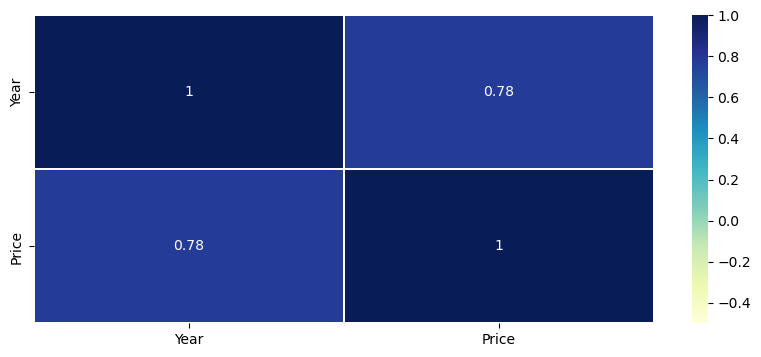

In [158]:
#Checking the correlation between the independent variable and dependent variable

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.5,vmax=1,linewidth=0.3,cmap='YlGnBu')

In [159]:
#Taking independent variable(Year) as x and dependent variable(Price) as y and dropping the target column

y=data['Price']
x=data.drop(['Price'],axis=1)
y


0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [130]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [131]:
#Test whether the machine learned properly
#Import Segregating data from scikit learn

from sklearn.model_selection import train_test_split

In [132]:
#Split the data for train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [133]:
# Importing Linear Regression model from scikit learn

from sklearn import linear_model
#Creating Instance

lin_reg=linear_model.LinearRegression()

In [134]:
#Fitting the model

model=lin_reg.fit(x_train,y_train)

In [135]:
# Evaluate the models with r2
lin_reg_score = lin_reg.score(x_test, y_test)

In [136]:
#Test the model

y_pred=model.predict(x_test)
y_pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [137]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

In [138]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import mean_squared_error
print('MSE = ',mean_squared_error(y_test,y_pred))

MSE =  3878767151.073449


In [139]:
from sklearn.metrics import r2_score
print('lin_reg_score=',r2_score(y_test,y_pred))

lin_reg_score= 0.4347961632108023


# Lasso Regression

In [140]:
## Create a lasso regression model
from sklearn.linear_model import Lasso

In [141]:
Lasso_reg=Lasso()

In [142]:
#Fitting the lasso regression model
model1=Lasso_reg.fit(x_train,y_train)

In [143]:
# Evaluate the models with r^2
lasso_reg_score = Lasso_reg.score(x_test, y_test)

In [144]:
#Making prediction

y_pred_lasso=Lasso_reg.predict(x_test)



In [145]:
#Printing Mean Square Error 

print('MSE=',mean_squared_error(y_test,y_pred_lasso))

MSE= 3878735896.222091


In [146]:
#Printing r2 score

print('lasso_reg_score=',r2_score(y_test,y_pred_lasso))

lasso_reg_score= 0.4348007175862566


# # Predict the price of a 2022 model second-hand Grand i10

In [147]:
Predicted_price=lr.predict([[2022]])
print('Predicted price of a 2022 model second-hand Grand i10=', Predicted_price)

Predicted price of a 2022 model second-hand Grand i10= [740160.11937766]


In [148]:
#Determine which model is performing better

if lin_reg_score > lasso_reg_score:
    print("Linear regression is performing better.")
else:
    print("Lasso regression is performing better.")

Lasso regression is performing better.
